# Philip's Exploration of SF Crime Dataset
To start off this project, we plan on looking a bit into what data is in the dataset, and a bit of what we can do with said data. Initially, we load in the needed modules and also some commonly used modules:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('train.csv')
print data.head()
print data.describe()

                 Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.4387

Cool, we have some data. What's really interesting about this dataset, and will require a lot of playing around to manipulate the data in a way that is more understandable later on, is that most values are strings. The only real number values we have are the dates, along with x and y coordinates. The columns we have are as follow:

**Dates**, **Category** of offense, **Descript**ion of crime, **DayOfWeek**, **PdDistrict** of arrest, **Resolution** of crime, and **Address**, along with **X** and **Y** coordinates, of event.

## Looking into data
You know what would be cool. A map! I'm curious of the locations of events that happened, so let's plot them all on a map of SF using the X and Y coordinates (longitude and latitude). Inspiration was drawn from (https://www.kaggle.com/victoregb/sf-crime/sf-pd-districts-and-top-10-crime-maps/code). Starting off, we import the map file (in `.txt` format).

In [6]:
print len(data.X)
print len(data.Y)

878049
878049


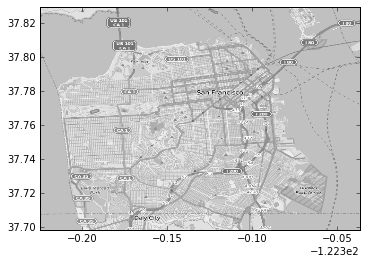

In [7]:
from mpl_toolkits.basemap import Basemap
mapdata = np.loadtxt("sf_map_copyright_openstreetmap_contributors.txt")

# implot = plt.imshow(mapdata, cmap = plt.get_cmap('gray'))

map = Basemap(projection='cyl',
                  resolution = 'h',
                  llcrnrlon = -122.52469, #Esquina inferior / ll.lon
                  llcrnrlat = 37.69862, #Esquina inferior / ll.lat
                  urcrnrlon = -122.33663, #Esquina superior / ur.lon
                  urcrnrlat = 37.82986, #Esquina superior / ur.lat
                  lat_0=37.752303,
                  lon_0=-122.445576)

plt.imshow(mapdata, cmap = plt.get_cmap('gray'),
            extent=[-122.52469, -122.33663, 37.69862, 37.82986])

plt.show()
# # create a larger image for the map so we can see it
# fig1 = plt.figure(figsize = (10,10))

# # read through the x,y values and plot a dot on the map
# for val in range(len(data.X)/100000):
#     plt.scatter(data.X[val], data.Y[val], marker=',')

# plt.savefig('map.png')